# INFO371 Problem Set: Bayes-Theorem based Spam Filter

In this problem set you will use Bayes Theorem to categorize 
emails from Ling-Spam corpus into spam and non-spam.  Using a single-word-based Bayes approach does not give good results, but this problem set serves as a preparatory
work for understanding the Naive Bayes approach.


## Ling-Spam emails

The corpus contains ~ 2700 emails from academic accounts talking
about conferences, deadlines, papers etc, and peppered with wonderful
offers of viagra, lottery millions and similar spam messages.  The
emails have been converted into a csv file that contains three variables:

* spam --> true or false, this email is spam
* files --> the original file name for this email (not needed in this HW).
* message --> the content of the email in a single line


## (5pt) Explore and clean the data

First, let's load data and take a closer look at it.

1. (2pt) Load the lingspam-emails.csv.bz2 dataset.  Browse a handful of emails, both spam and non-spam ones, to see what kind of text we are working with here.Hint: check out textwrap module to print long strings on multiple lines.
  
  
2. (3pt) Ensure the data is clean: remove all cases with missing spam and empty message field.  We do not care about the file names.

In [1]:
# code goes here 
import pandas as pd
df = pd.read_csv("lingspam-emails.csv.bz2", delimiter = '\t')
df = df.dropna(subset=['spam', 'message'])
df = df[['spam', 'message']]
df.head()

,spam,message
0,False,Subject: re : 2 . 882 s - > np np > date : su...
1,False,Subject: s - > np + np the discussion of s - ...
2,False,Subject: 2 . 882 s - > np np . . . for me it ...
3,False,"Subject: gent conference "" for the listserv ""..."
4,False,Subject: query : causatives in korean could a...


## (15pt) Create Document-term matrix (DTM)

The first serious step is to create the document-term matrix (DTM).
This is simply numeric indicators for selected words: does this email
contain the word (1) or not (0).  But before we get there, we have to
decide the words.


1. (2pt) Choose 10+ words which might be good to distinguish between spam/non-spam.  Use these four: ''viagra'', ''deadline'', ''million'', and ''and''.  Choose more words yourself (you may want to return here and reconsider your choice later).


2. (10pt) Convert your messages into DTM.  We do not use the full 60k-words DTM here but only a baby-DTM of the 10 words you picked above. You may add the DTM columns to the original data frame, or keep those in a separate structure. 

Creating the DTM involves finding whether the word is contained in the message for all emails in data. You can loop over emails and check each one individually, but pandas string methods make life much easier.  You will want to do case-insensitive matching, checking for both upper and lower case.  You may consider something like this:

```
for w in list_of_words:
    emails[w] = emails.message.str.lower().str.contains(w)
```

  Note: It is more intuitive to work with your data if you
  convert the logical values returned by contains to numbers.
  
  
  
3. (3pt) Split your work data (i.e. the DTM) and target (the spam indicator) into training and validation chunks (80/20 is a good split).

In [2]:
# code goes here
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
words = ['viagra', 'deadline', "million","and", "fast", "crypto", 'click', "now", 'money', 'free']
model = CountVectorizer(vocabulary=words, binary=True)
dtm = model.fit_transform(df.message.str.lower())
dtm_df = pd.DataFrame(dtm.toarray(), columns=words)
print(dtm_df.head())
X = dtm_df
y = df.spam
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

   viagra  deadline  million  and  fast  crypto  click  now  money  free
0       0         0        0    1     0       0      0    1      0     0
1       0         0        0    0     0       0      0    1      0     0
2       0         0        0    0     0       0      0    0      0     0
3       0         0        0    1     0       0      0    0      1     0
4       0         0        0    1     0       0      0    0      0     0


## (80pt) Estimate and validate

Now you are ready with the preparatory work and it's time to
dive into the real thing.  Let's rehearse the Bayes theorem here
again.  We want to estimate the probability that an email is spam, given it
contains a certain word: 

$Pr(category = S|w = 1) = \frac{Pr(w=1|category = S) * Pr(category=S)}{Pr(w=1)}$.


In order to compute this probability, we need to calculate some other
probabilities: 

* $Pr(category=S)$ --> Probability of spam in data

* $Pr(category=NS)$ --> Probablility for non-spam in data

* $Pr(w=1)$ --> Probability the word is seen in messages

* $Pr(w=0)$ --> probability the word is not seen in messages

* $Pr(w=1|category = S)$ --> & probability the word is seen in messages that are spam

* $Pr(w=1|category = NS)$ --> probability the word is seen in messages that are not spam

....


but it turns out we are still not done with preparations. Namely, you need to compute 
quite a few different probabilities below, including $Pr(category=S)$, $Pr(category=NS)$, $Pr(w=1)$, $Pr(w=0)$, $Pr(w=1|category = S)$, $Pr(w=0|category = S)$, $Pr(w=1|category = NS)$, $Pr(w=0|category = NS)$.


1. (2pt) Design a scheme for your variable names that describes these probabilities so that a) you understand what they mean; and b) the others (including your grader) will understand those! Hint: you may get some ideas from the [Python notes](https://faculty.washington.edu/otoomet/machinelearning-py/python.html#base-language) in Section 2.3, Base Language.

The first task is to compute these probabilities.
Use only training data for this task.

2. (4pt) Compute the priors, the unconditional probabilities for an email being spam and non-spam, $Pr(category=S)$ and $Pr(category=NS)$.  These probabilities are based on the spam variable alone, not on the text.


The next tasks involve computing the following probabilities for each
word out of the list of 10 you picked above,
I recommend to avoid unneccessary complexity and
just to write a loop over the words, compute the
answers, and print the word and the corresponding results there.  



3. (4pt) For each word $w$, compute the normalizers, $Pr(w=1)$ and $Pr(w=0)$.
  
  Hint: this is $Pr(million = 1) = 0.0484$.  But note this value
  (and the following hints) depends on your random training/validation split!
  
  
4. (7pt) For each word $w$, compute $Pr(w=1|category = S)$ and $Pr(w=1|category = NS)$.  These probabilities are based on both the spam-variable and on the DTM component that corresponds to the word $w$.
  
  Hint: $Pr(million = 1|category = S) = 0.252$
  
  
5. (5pt) Finally, compute the probabilities of interest, $Pr(category = S|w = 1)$ and $Pr(category = S|w = 0)$.  Compute this value using Bayes theorem, not directly by counting! 
  
  For the check, you may also compute
  $Pr(category = NS|w = 1)$ and $Pr(category = NS|w = 0)$
  
  Hint: $\Pr(\mathit{category} = S|\mathit{million} = 1) = 0.843$.  But
  note this number depends on your random testing-validation split!


6. (6pt)  Which of these probabilities have to sum to one? (E.g. $Pr(category = 1) + Pr(category = 0) = 1$.) Which ones do not?  Explain!

---
Now we are done with the estimator.  Your fitted model is completely
described by these probabilities.  Let's now turn to prediction, using
your validation data.  Note that we are still inside the loop over
each word $w$!

9. (8pt) For each email in your validation set, predict whether it is predicted to be spam or non-spam.  Hint: you should check if it contains the word $w$ and use the appropriate probability, $Pr(category = S|w = 1)$ or $Pr(category = S|w = 0)$.


10. (5pt) Print the resulting confusion matrix and compute accuracy, precision and recall.


11. (5pt) Which steps above constitute model training?  In which steps do you use trained model?  What is a trained model in this case? Explain! 
  
  Hint: a trained model is all you need to make predictions.

---
Now it is time to look at your results a little bit closer.

12. (4pt) Comment the overall performance of the model--how do accuracy, precision and recall look like?


13. (8pt) Explain why do you see very low recall while the other indicators do not look that bad.


14. (8pt) Explain why some words work well and others not: 
  * why does ''million'' improve accuracy?
  * why does ''viagra'' not work?
  * why does ''deadline'' not work?
  * why does ''and'' not work?

  Hint: You may just see where in which emails these words occur, and
  how frequently.  These are all different reasons!
  
---
Finally, let's add Laplace smoothing to this model.  One can imagine
Laplace smoothing as two additional ''ghost'' observations, one spam
and one non-spam.  Both of these ghost observations contain every
single word in our DTM.  See also [Lecture Notes](https://faculty.washington.edu/otoomet/machineLearning.pdf), Ch 7.3.2 ''Smoothing: how to compute probabilities with too
few data'', page 263.

Laplace smoothing does not add anything here but it is is a crucial
tool when we move to Naive Bayes later.

15. (5pt) Add such smoothing to the model.  You can either literally add two such lines of data, or alternatively manipulate the way you compute the probabilities.


16. (5pt) Repeat the tasks above: compute the probabilities, do predictions, compute the accuracy, precision, recall for all words.  


17. (4pt) Comment on the results.  Does smoothing improve the overall performance? 

In [3]:
probability_spam = y_train.sum() / len(y_train)
probability_not_spam = 1 - probability_spam
print("P(category = S) and P(category = NS)")
print(probability_spam, probability_not_spam)
print()

print('Probabilities of w=1 for each word in the set')
print(X_train.mean())
print()
print('Probabilities of w=0 for each word in the set')
print(1-X_train.mean())

train_data = pd.concat([X_train, y_train], axis=1)
spam_data = train_data[train_data['spam'] == True]
non_spam_data = train_data[train_data['spam'] == False]
X_train_spam = spam_data.drop(columns='spam')
X_train_not_spam = non_spam_data.drop(columns='spam')

print('Probabilities of w=1 for each word in the set given spam = True')
print(X_train_spam.mean())
print()
print('Probabilities of w=1 for each word in the set given spam = False')
print(X_train_not_spam.mean())

P(category = S) and P(category = NS)
0.16810717372515124 0.8318928262748487

Probabilities of w=1 for each word in the set
viagra      0.000432
deadline    0.143042
million     0.034572
and         0.923077
fast        0.023768
crypto      0.001729
click       0.049697
now         0.212187
money       0.085566
free        0.154278
dtype: float64

Probabilities of w=0 for each word in the set
viagra      0.999568
deadline    0.856958
million     0.965428
and         0.076923
fast        0.976232
crypto      0.998271
click       0.950303
now         0.787813
money       0.914434
free        0.845722
dtype: float64

Probabilities of w=1 for each word in the set given spam = True
viagra      0.002571
deadline    0.000000
million     0.161954
and         0.902314
fast        0.079692
crypto      0.005141
click       0.264781
now         0.503856
money       0.370180
free        0.570694
dtype: float64

Probabilities of w=1 for each word in the set given spam = False
viagra      0.000000
dea

In [4]:
P_category_spam = probability_spam
P_category_not_spam = probability_not_spam
P_word_1 = X_train.mean()
P_word_0 = 1 - P_word_1

#bayes theorem
P_category_spam_given_word_1 = (X_train_spam.mean() * P_category_spam) / P_word_1
P_category_spam_given_word_0 = ((1 - X_train_spam.mean()) * P_category_spam) / P_word_0

print('Probability of category=S given word=1:')
print(P_category_spam_given_word_1)
print()

print('Probability of category=S given word=0:')
print(P_category_spam_given_word_0)

Probability of category=S given word=1:
viagra      1.000000
deadline    0.000000
million     0.787500
and         0.164326
fast        0.563636
crypto      0.500000
click       0.895652
now         0.399185
money       0.727273
free        0.621849
dtype: float64

Probability of category=S given word=0:
viagra      0.167748
deadline    0.196167
million     0.145927
and         0.213483
fast        0.158477
crypto      0.167532
click       0.130059
now         0.105869
money       0.115784
free        0.085335
dtype: float64


The probabilities which have to sum to 1 are the ones which are compliments of each other. For example all priors such as P(category = S) and P(category = NS) must be one as spam + non-spam is the whole set. The addition of conditionallity means that generally most of the remaining probabilities do not sum to one as they both do represent partials of a whole but instead subsets of a general domain (depending on the condition).

Accuracy of our model:  0.9050086355785838
Recall of our model:  0.4673913043478261
Precision of our model:  0.8775510204081632


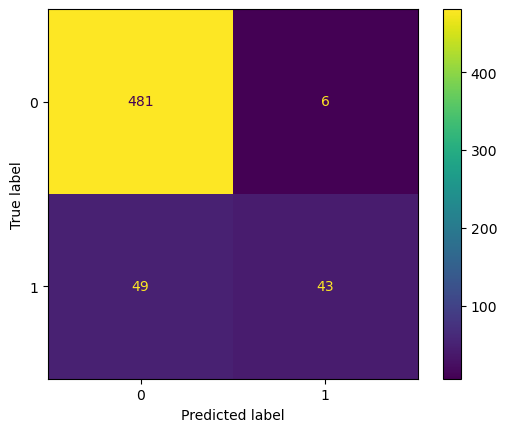

In [39]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, recall_score, precision_score
prediction_array = []

for index, row in X_test.iterrows():
    contains_word = any(value == 1 for value in row)
    if contains_word:
        prediction = any(P_category_spam_given_word_1[word] > 0.75 for word, value in row.items() if value == 1)
    else:
        prediction = any(P_category_spam_given_word_0[word] > 0.75 for word, value in row.items() if value == 0)
    prediction_array.append(prediction)
    
print('Accuracy of our model: ',accuracy_score(y_test,prediction_array))
print('Recall of our model: ',recall_score(y_test,prediction_array))
print('Precision of our model: ',precision_score(y_test,prediction_array))

conf = confusion_matrix(y_test,prediction_array)
disp = ConfusionMatrixDisplay(conf)
disp.plot()

The results above show a relatively well trained model which can predict spam at an accuracy of around 90% based on the training data and bayes theorem.

Which steps above constitute model training? In which steps do you use trained model? What is a trained model in this case? Explain!

Model training is the portion of forming the Probability series for each word. Doing this allows up to create a map of out data which tells us if a word w exists whats the probability it is spam and gives "direction" to how a predication should be made steps 4 and 5 are the closest to model training. The trained model in this case is the probability map as it tells us how to make predictive decisions probabilistically.


The performance of the model is quite strong with an accuracy of 90% a precision of 88% and a recall of 47%.

A low recall indicates that while the model guess well overall (accuracy) and when it guesses it is correct (precision) it is not accuretly capturing all of the spam emails in the filter. The reason for this is probably the small number of words used in the set.

Million works well because it generally indicates spam if its present in a high probability. Viagra and deadline both fail for the same reason as they have probabilities of 1 and 0 respectively which in the case of bayes theorem is problematic for calculations. Generally probabilities of 0 and 1 require smoothing to be leveraged effectively in a NB model. Additionally there may be extremely low volume but high probability for certain words which result in columns the model deems as entirely important and definuing. And doesn't work simply due to its abudence. In the conditional probabilities it is clear that the presence or lack of presence of and does not really give information as almost all emails contained it.





Notes for the assignment:

1. I felt like this HW was significantly more difficult and arduous than the in class examples. I found myself having to take the general approach we learned using CategoricalNB and back-engineering it with lab 3 to try and formulate this assignment. If we could spend more time doing the "by-hand in code" examples and less SKlearn hand holding I would have felt way more prepared for this HW. THANK YOU!
2. TIME TO COMPLETE: approximately 10-12 hours.